### Abstract

This is an example to show to use use the basic API of TensorFlow, to construct a linear regression model. 

This notebook is an exercise written from [the Medium.com blog](https://medium.com/@saxenarohan97/intro-to-tensorflow-solving-a-simple-regression-problem-e87b42fd4845).

Note that recent version of TensorFlow does have more advanced API such like LinearClassifier that provides the scikit-learn alike machine learning API.

In [19]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

Split the data into training, validation and test sets.

In [41]:
# Retrieve the data
bunch = load_boston()
print('total data shape:', bunch.data.shape)

total_features = bunch.data[:, range(12)]
total_prices = bunch.data[:, [12]]

print('features shape:', total_features.shape, 'targe shape:', total_prices.shape)

# new in 0.18 version
# total_features, total_prices = load_boston(True)

# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]
print('training dataset:', len(train_features))

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]
print('validation dataset:', len(valid_features))

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]
print('test dataset:', len(test_features))

total data shape: (506, 13)
features shape: (506, 12) targe shape: (506, 1)
training dataset: 300
validation dataset: 100
test dataset: 106


#### Linear Regression Model 

In [42]:
w = tf.Variable(tf.truncated_normal([12, 1], mean=0.0, stddev=1.0, dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [43]:
def calc(x, y):
    '''
        linear regression model that return (prediction, L2_error)
    '''
    # Returns predictions and error
    predictions = tf.add(b, tf.matmul(x, w))
    error = tf.reduce_mean(tf.square(y - predictions))
    return [ predictions, error ]

In [47]:
y, cost = calc(train_features, train_prices)

In [80]:
# Feel free to tweak these 2 values:
learning_rate = 0.005
epochs = 100
errors = [[], []] 

init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)


with sess:
    sess.run(init)

    for i in list(range(epochs)):

        sess.run(optimizer)

        errors[0].append(i+1)
        errors[1].append(sess.run(cost))

        if i % 10 == 0:
            print('epoch:', i, 'L2 error:', sess.run(cost))

    valid_cost = calc(valid_features, valid_prices)[1]

    print('Validation error =', sess.run(valid_cost), '\n')

    test_cost = calc(test_features, test_prices)[1]

    # print('Test error =', sess.run(test_cost), '\n')

epoch: 0 L2 error: 149.484231159
epoch: 10 L2 error: 122.310021968
epoch: 20 L2 error: 101.429020246
epoch: 30 L2 error: 84.9450138025
epoch: 40 L2 error: 71.7366872109
epoch: 50 L2 error: 61.0643938404
epoch: 60 L2 error: 52.3985250857
epoch: 70 L2 error: 45.3392956161
epoch: 80 L2 error: 39.5754353948
epoch: 90 L2 error: 34.860339332
Validation error = 73.1253300716 



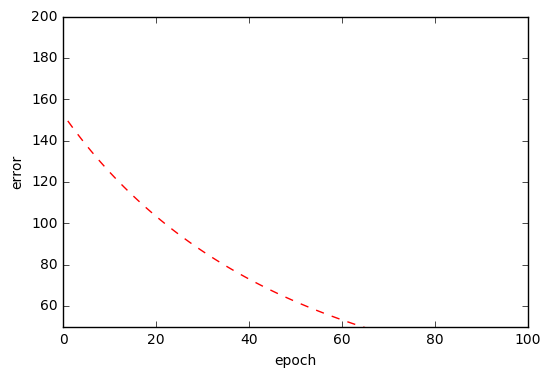

In [81]:
ax = plt.plot(errors[0], errors[1], 'r--')

plt.axis([0, epochs, 50, 200])
plt.xlabel('epoch')
plt.ylabel('error')

plt.show()